In [1]:
print("Hello")

Hello


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
frost_data = pd.read_excel(r"C:\Users\mahit\Desktop\Data5000\Water_distribution_proj_V2.xlsx")
frost_data_training = pd.read_excel(r"C:\Users\mahit\Desktop\Data5000\Frost_Data_Training.xlsx")
frost_data_testing = pd.read_excel(r"C:\Users\mahit\Desktop\Data5000\Frost_Data_Testing.xlsx")

In [4]:
frost_data

,Year,Date,Mean Temperature,Cumulative Mean Temperature,Frost Model - Depth in cm,Frost Model - Depth in Inches
0,2011,2011-11-01,6.4,6.4,0.000000,0.000000
1,2011,2011-11-02,7.7,14.1,0.000000,0.000000
2,2011,2011-11-03,5.6,19.7,0.000000,0.000000
3,2011,2011-11-04,1.6,21.3,0.000000,0.000000
4,2011,2011-11-05,1.7,23.0,0.000000,0.000000
...,...,...,...,...,...,...
1593,2022,2022-01-20,-18.8,-256.7,-83.123969,-32.725972
1594,2022,2022-01-21,-24.0,-280.7,-87.240734,-34.346746
1595,2022,2022-01-22,-23.2,-303.9,-91.131241,-35.878442
1596,2022,2022-01-23,-18.1,-322.0,-94.110507,-37.051381


In [5]:
frost_data["Cumulative Mean Temperature"] = frost_data["Cumulative Mean Temperature"].fillna(0)
frost_data_training["Cumulative Mean Temperature"] = frost_data_training["Cumulative Mean Temperature"].fillna(0)
frost_data_testing["Cumulative Mean Temperature"] = frost_data_testing["Cumulative Mean Temperature"].fillna(0)

In [6]:
frost_data["Mean Temperature"]

0        6.4
1        7.7
2        5.6
3        1.6
4        1.7
        ... 
1593   -18.8
1594   -24.0
1595   -23.2
1596   -18.1
1597   -22.0
Name: Mean Temperature, Length: 1598, dtype: float64

(array([  5.,  42., 100., 209., 286., 375., 394., 141.,  32.,  14.]),
 array([-29.6, -24.9, -20.2, -15.5, -10.8,  -6.1,  -1.4,   3.3,   8. ,
         12.7,  17.4]),
 <BarContainer object of 10 artists>)

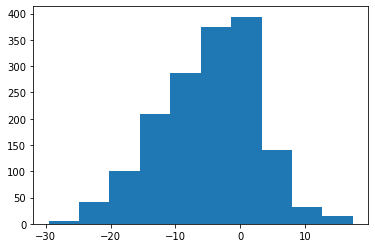

In [7]:
plt.hist(frost_data["Mean Temperature"],bins=10)

(array([ 70.,  33.,  88., 135., 158., 142., 150., 171., 322., 329.]),
 array([-1123.2,  -995.6,  -868. ,  -740.4,  -612.8,  -485.2,  -357.6,
         -230. ,  -102.4,    25.2,   152.8]),
 <BarContainer object of 10 artists>)

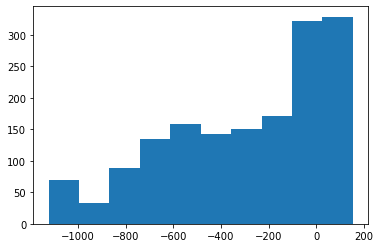

In [8]:
plt.hist(frost_data["Cumulative Mean Temperature"],bins=10)

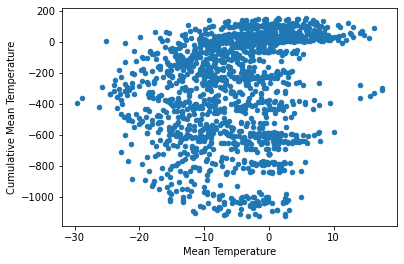

In [9]:
frost_data.plot(kind='scatter', x='Mean Temperature', y='Cumulative Mean Temperature') ;
plt.show()

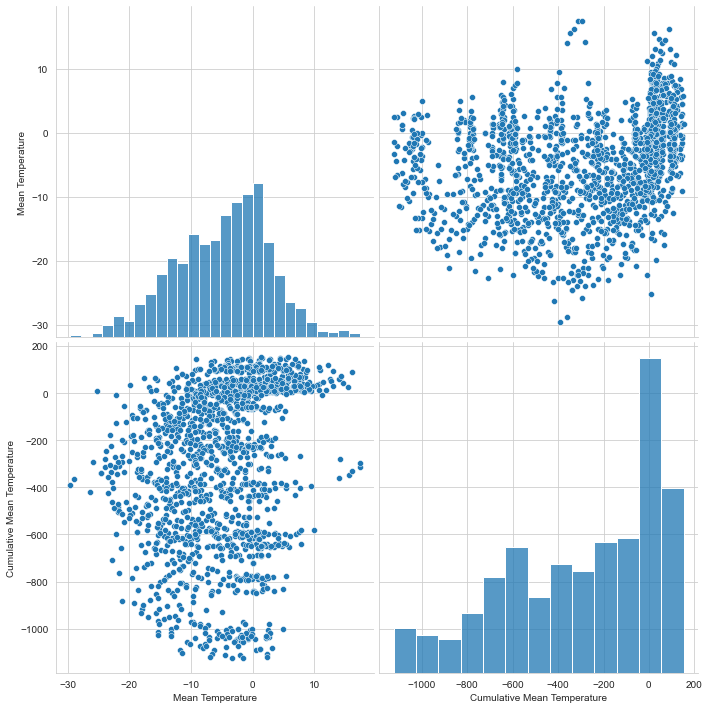

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(frost_data[['Mean Temperature', 'Cumulative Mean Temperature']], height=5);
plt.show()

C:\Users\mahit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


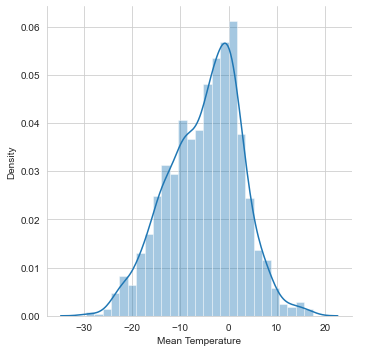

In [11]:
sns.FacetGrid(frost_data, height=5) \
   .map(sns.distplot, "Mean Temperature") \
   .add_legend();
plt.show();

C:\Users\mahit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


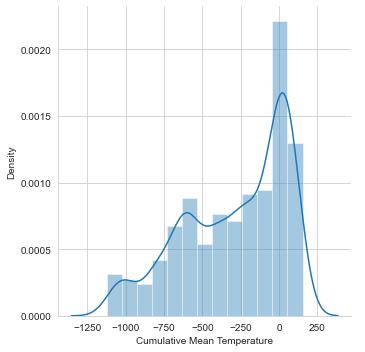

In [12]:

sns.FacetGrid(frost_data, height=5) \
   .map(sns.distplot, "Cumulative Mean Temperature") \
   .add_legend();
plt.show();

[0.00312891 0.02628285 0.06257822 0.13078849 0.17897372 0.23466834
 0.2465582  0.08823529 0.02002503 0.00876095]
[-29.6 -24.9 -20.2 -15.5 -10.8  -6.1  -1.4   3.3   8.   12.7  17.4]


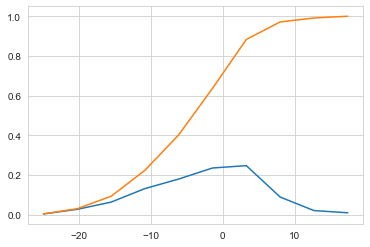

In [13]:
counts, bin_edges = np.histogram(frost_data['Mean Temperature'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)




[0.04380476 0.02065081 0.05506884 0.0844806  0.09887359 0.08886108
 0.09386733 0.10700876 0.20150188 0.20588235]


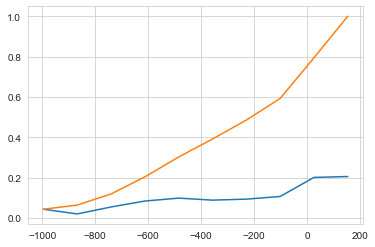

In [14]:
counts, bin_edges = np.histogram(frost_data['Cumulative Mean Temperature'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

In [15]:
print("Mean:")
print(np.mean(frost_data["Mean Temperature"]))
print(np.mean(frost_data["Cumulative Mean Temperature"]))

print("\nStd-dev:");
print(np.std(frost_data["Mean Temperature"]))
print(np.mean(frost_data["Cumulative Mean Temperature"]))

Mean:
-4.917584480600753
-292.0638297872338

Std-dev:
7.594406901977302
-292.0638297872338


In [16]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedian:")
print(np.median(frost_data["Mean Temperature"]))
print(np.median(frost_data["Cumulative Mean Temperature"]))
print("\nQuantile:")
print(np.percentile(frost_data["Mean Temperature"],np.arange(25, 125, 25)))
print(np.percentile(frost_data["Cumulative Mean Temperature"],np.arange(25, 125, 25)))
print("\n90th Percentile:")
print(np.percentile(frost_data["Mean Temperature"],90))
print(np.percentile(frost_data["Cumulative Mean Temperature"],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation:")
print(robust.mad(frost_data["Mean Temperature"]))
print(robust.mad(frost_data["Cumulative Mean Temperature"]))


Median:
-3.8499999999999996
-220.29999999999998

Quantile:
[-10.1   -3.85   0.4   17.4 ]
[-577.9 -220.3   10.8  152.8]

90th Percentile:
3.7
71.50999999999996

Median Absolute Deviation:
7.635401425303849
371.0953352919521


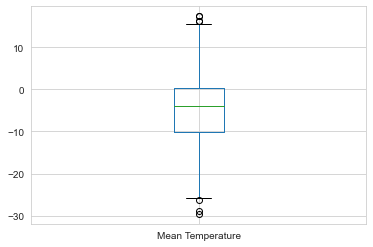

In [17]:
#sns.boxplot(x='Mean Temperature',y='Cumulative Mean Temperature', data=frost_data
frost_data.boxplot("Mean Temperature");
plt.show()

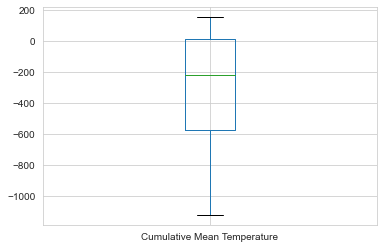

In [18]:
frost_data.boxplot("Cumulative Mean Temperature");
plt.show()

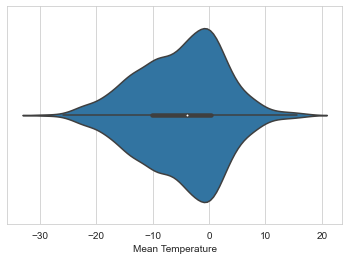

In [19]:
sns.violinplot(x="Mean Temperature", data=frost_data, size=8)
plt.show()

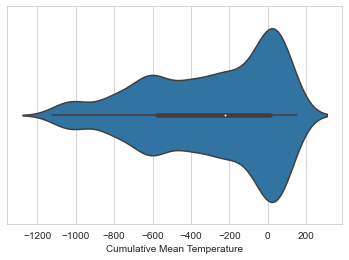

In [20]:
sns.violinplot(x="Cumulative Mean Temperature", data=frost_data, size=8)
plt.show()

Text(0.5, 1.0, 'Correlations')

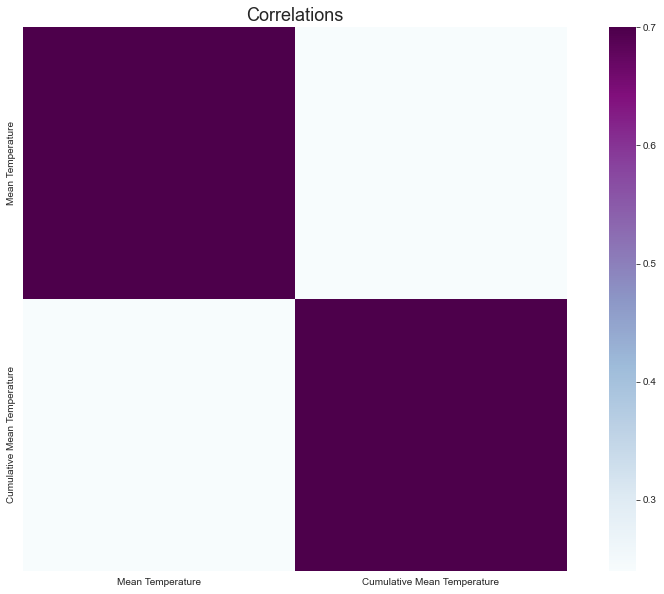

In [21]:
corr = frost_data[["Mean Temperature","Cumulative Mean Temperature"]].corr()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap="BuPu", vmax=0.7, square=True)
ax.set_title("Correlations", fontsize = 18)

In [22]:
frost_data_training = frost_data_training[["Mean Temperature","Cumulative Mean Temperature","Frost Model - Depth in Inches"]]
frost_data_train_label = frost_data_training["Frost Model - Depth in Inches"]
frost_data_training = frost_data_training[["Mean Temperature","Cumulative Mean Temperature"]]

In [23]:
frost_data_testing = frost_data_testing[["Mean Temperature","Cumulative Mean Temperature","Frost Model - Depth in Inches"]]
frost_data_test_label = frost_data_testing["Frost Model - Depth in Inches"]
frost_data_testing = frost_data_testing[["Mean Temperature","Cumulative Mean Temperature"]]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
frost_data_training = scaler.fit_transform(frost_data_training)
frost_data_testing = scaler.transform(frost_data_testing)

In [25]:
frost_data_training

array([[ 1.45360625,  0.87959533],
       [ 1.61974268,  0.90184844],
       [ 1.35136845,  0.91803252],
       ...,
       [ 1.26191037, -1.54599358],
       [ 0.85295917, -1.54108056],
       [ 0.92963752, -1.53443352]])

In [26]:
frost_data_testing

array([[ 1.26191037,  0.87526031],
       [ 1.04465505,  0.88450836],
       [ 0.98075642,  0.8923114 ],
       ...,
       [-2.32919241, -0.01717607],
       [-1.67742643, -0.06948533],
       [-2.17583571, -0.13306564]])

In [27]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(frost_data_training,frost_data_train_label)

LinearRegression()

In [28]:
print("Coefficients of the model :",lm.coef_)
print("Intercept of the model :",lm.intercept_)

Coefficients of the model : [ 1.93859236 22.89493122]
Intercept of the model : -31.708042653326828


In [29]:
frost_data_test_pred = lm.predict(frost_data_testing)

In [30]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(frost_data_test_pred - frost_data_test_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((frost_data_test_pred - frost_data_test_label) ** 2))
print("R2-score: %.2f" % r2_score(frost_data_test_pred,frost_data_test_label))

Mean absolute error: 3.35
Residual sum of squares (MSE): 18.11
R2-score: 0.96


In [31]:
def visualize(method, RMSE, y_pred, y_val):
    ax, fig = plt.subplots(figsize=(10,8))
    plt.plot(y_pred, 'b.', marker='*')
    plt.plot(y_val.reset_index(drop=True), 'r.')
    x = np.linspace(0,len(y_pred),num=len(y_pred))
    m, b = np.polyfit(x, y_pred, 1)
    plt.plot(x, m*x+b, 'g')
    m, b = np.polyfit(x, y_val, 1)
    plt.plot(x, m*x+b, 'm--')
    plt.legend(['Prediction', 'Ground Truth', 'Prediction Line', 'GT Line'])
    plt.title('Model : {}, RMSE : {}'.format(method, RMSE))
    plt.show()

C:\Users\mahit\AppData\Local\Temp/ipykernel_22128/2057572333.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_pred, 'b.', marker='*')


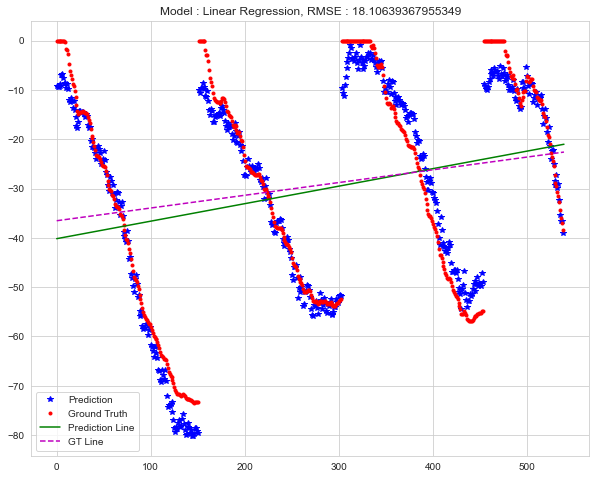

In [32]:
visualize("Linear Regression",np.mean((frost_data_test_pred - frost_data_test_label) ** 2),frost_data_test_pred,frost_data_test_label)

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knnreg = KNeighborsRegressor()
knnreg.fit(frost_data_training,frost_data_train_label)

KNeighborsRegressor()

In [35]:
frost_data_test_pred = knnreg.predict(frost_data_testing)

In [36]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(frost_data_test_pred - frost_data_test_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((frost_data_test_pred - frost_data_test_label) ** 2))
print("R2-score: %.2f" % r2_score(frost_data_test_pred,frost_data_test_label))

Mean absolute error: 3.22
Residual sum of squares (MSE): 15.56
R2-score: 0.97


C:\Users\mahit\AppData\Local\Temp/ipykernel_22128/2057572333.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_pred, 'b.', marker='*')


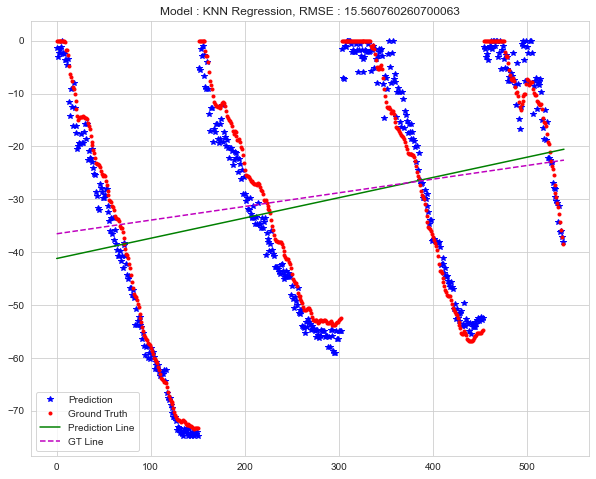

In [37]:
visualize("KNN Regression",np.mean((frost_data_test_pred - frost_data_test_label) ** 2),frost_data_test_pred,frost_data_test_label)

In [38]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(frost_data_training,frost_data_train_label)

SVR()

In [39]:
frost_data_test_pred = svr.predict(frost_data_testing)

In [40]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(frost_data_test_pred - frost_data_test_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((frost_data_test_pred - frost_data_test_label) ** 2))
print("R2-score: %.2f" % r2_score(frost_data_test_pred,frost_data_test_label))

Mean absolute error: 3.02
Residual sum of squares (MSE): 14.18
R2-score: 0.97


C:\Users\mahit\AppData\Local\Temp/ipykernel_22128/2057572333.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_pred, 'b.', marker='*')


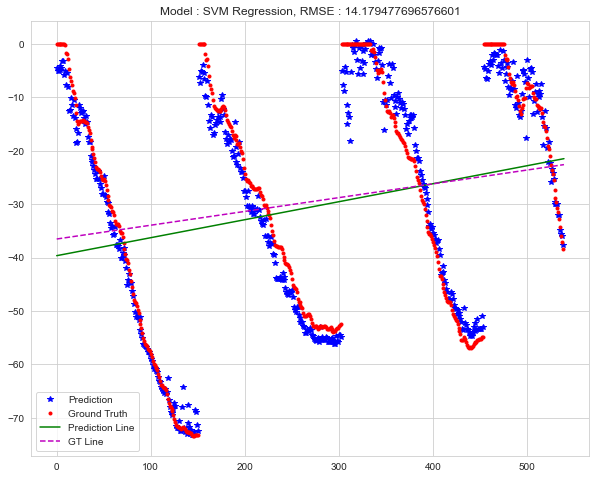

In [41]:
visualize("SVM Regression",np.mean((frost_data_test_pred - frost_data_test_label) ** 2),frost_data_test_pred,frost_data_test_label)

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(frost_data_training,frost_data_train_label)

DecisionTreeRegressor()

In [43]:
frost_data_test_pred = dtreg.predict(frost_data_testing)

In [44]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(frost_data_test_pred - frost_data_test_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((frost_data_test_pred - frost_data_test_label) ** 2))
print("R2-score: %.2f" % r2_score(frost_data_test_pred,frost_data_test_label))

Mean absolute error: 3.43
Residual sum of squares (MSE): 21.28
R2-score: 0.96


C:\Users\mahit\AppData\Local\Temp/ipykernel_22128/2057572333.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_pred, 'b.', marker='*')


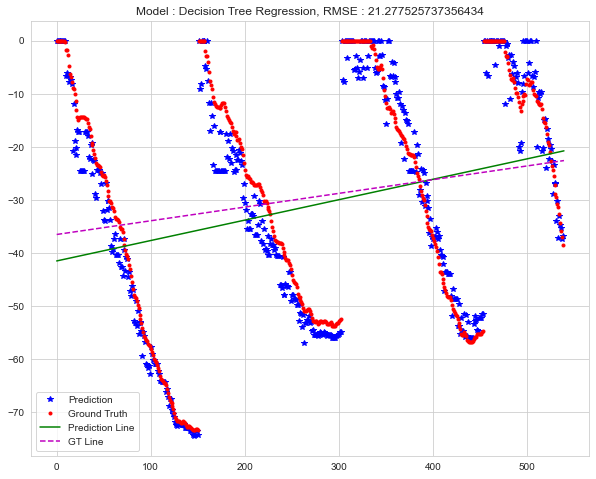

In [45]:
visualize("Decision Tree Regression",np.mean((frost_data_test_pred - frost_data_test_label) ** 2),frost_data_test_pred,frost_data_test_label)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg.fit(frost_data_training,frost_data_train_label)

RandomForestRegressor()

In [47]:
frost_data_test_pred = rfreg.predict(frost_data_testing)

In [48]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(frost_data_test_pred - frost_data_test_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((frost_data_test_pred - frost_data_test_label) ** 2))
print("R2-score: %.2f" % r2_score(frost_data_test_pred,frost_data_test_label))

Mean absolute error: 3.15
Residual sum of squares (MSE): 15.72
R2-score: 0.97


C:\Users\mahit\AppData\Local\Temp/ipykernel_22128/2057572333.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_pred, 'b.', marker='*')


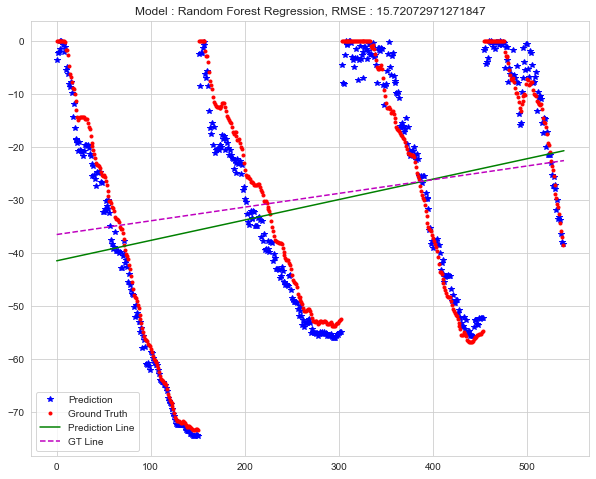

In [49]:
visualize("Random Forest Regression",np.mean((frost_data_test_pred - frost_data_test_label) ** 2),frost_data_test_pred,frost_data_test_label)

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor()
gbreg.fit(frost_data_training,frost_data_train_label)
frost_data_test_pred = gbreg.predict(frost_data_testing)

In [51]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(frost_data_test_pred - frost_data_test_label)))
print("Residual sum of squares (MSE): %.2f" % np.mean((frost_data_test_pred - frost_data_test_label) ** 2))
print("R2-score: %.2f" % r2_score(frost_data_test_pred,frost_data_test_label))

Mean absolute error: 3.13
Residual sum of squares (MSE): 14.71
R2-score: 0.97


C:\Users\mahit\AppData\Local\Temp/ipykernel_22128/2057572333.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_pred, 'b.', marker='*')


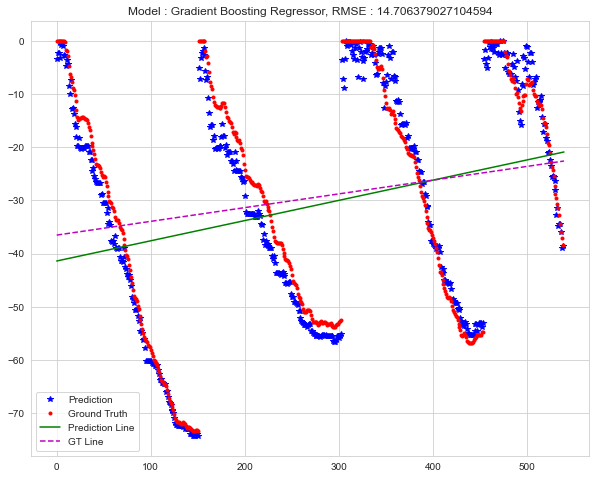

In [52]:
visualize("Gradient Boosting Regressor",np.mean((frost_data_test_pred - frost_data_test_label) ** 2),frost_data_test_pred,frost_data_test_label)

In [53]:
data_table = []
data_table.append(["Linear Regression",3.35,18.11,0.96])
data_table.append(["KNN Regression",3.22,15.56,0.97])
data_table.append(["SVM Regression",3.02,14.18,0.97])
data_table.append(["Decision Tree Regression",3.45,21.67,0.96])
data_table.append(["Random Forest Regression",3.15,15.97,0.97])
data_table.append(["GradientBoostingRegressor",3.13,14.71,0.97])
data_table

[['Linear Regression', 3.35, 18.11, 0.96],
 ['KNN Regression', 3.22, 15.56, 0.97],
 ['SVM Regression', 3.02, 14.18, 0.97],
 ['Decision Tree Regression', 3.45, 21.67, 0.96],
 ['Random Forest Regression', 3.15, 15.97, 0.97],
 ['GradientBoostingRegressor', 3.13, 14.71, 0.97]]

In [54]:
data_table = pd.DataFrame(data_table,columns=["Regressor","Mean Absolute Error","RMSE","R2-score"])
with pd.option_context('display.precision', 2):
    formatted_table=(data_table[["Regressor","Mean Absolute Error","RMSE"]].style.background_gradient(cmap ='Blues'))
formatted_table

,Regressor,Mean Absolute Error,RMSE
0,Linear Regression,3.35,18.11
1,KNN Regression,3.22,15.56
2,SVM Regression,3.02,14.18
3,Decision Tree Regression,3.45,21.67
4,Random Forest Regression,3.15,15.97
5,GradientBoostingRegressor,3.13,14.71


In [55]:
data_table = pd.DataFrame(data_table,columns=["Regressor","Mean Absolute Error","RMSE","R2-score"])
with pd.option_context('display.precision', 2):
    formatted_table=(data_table[["Regressor","R2-score"]].style.background_gradient(cmap ='Blues'))
formatted_table

,Regressor,R2-score
0,Linear Regression,0.96
1,KNN Regression,0.97
2,SVM Regression,0.97
3,Decision Tree Regression,0.96
4,Random Forest Regression,0.97
5,GradientBoostingRegressor,0.97


In [61]:
def plotthebarchart(var):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_axes([0,0,1,1])
    model_names = data_table["Regressor"]
    model_parameter = data_table[var]
    ax.bar(model_names,model_parameter)
    xlocs,xlabs = plt.xticks()
    for i, v in enumerate(model_parameter):
        plt.text(i,v+0.01,str(v))
    plt.title("{} vs Regression Models".format(var))
    plt.xlabel("Machine Learning Models")
    plt.ylabel(var)
    plt.show()

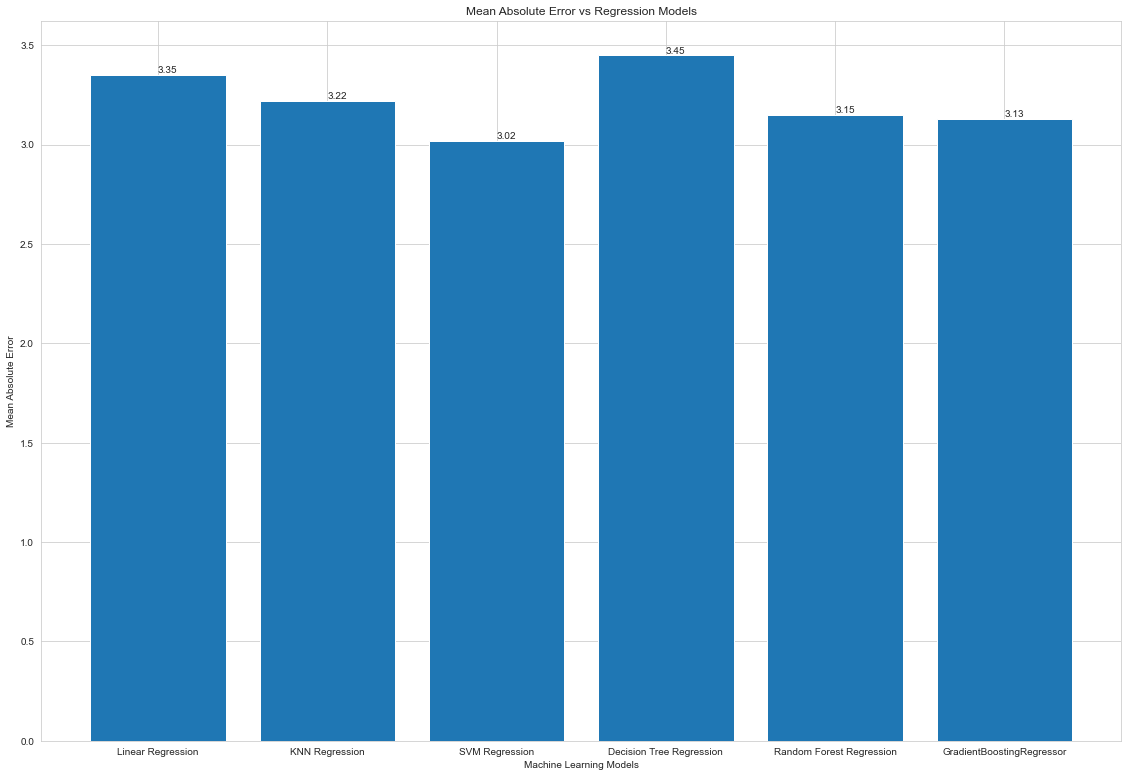

In [62]:
plotthebarchart("Mean Absolute Error")

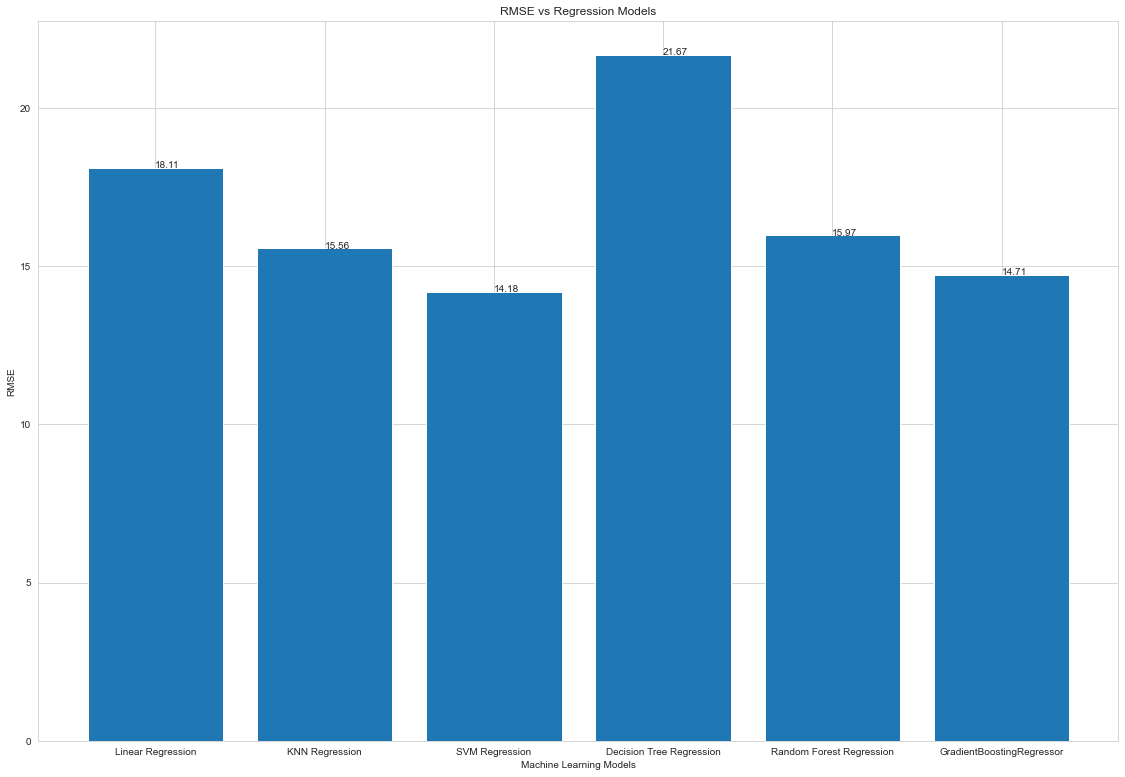

In [63]:
plotthebarchart("RMSE")

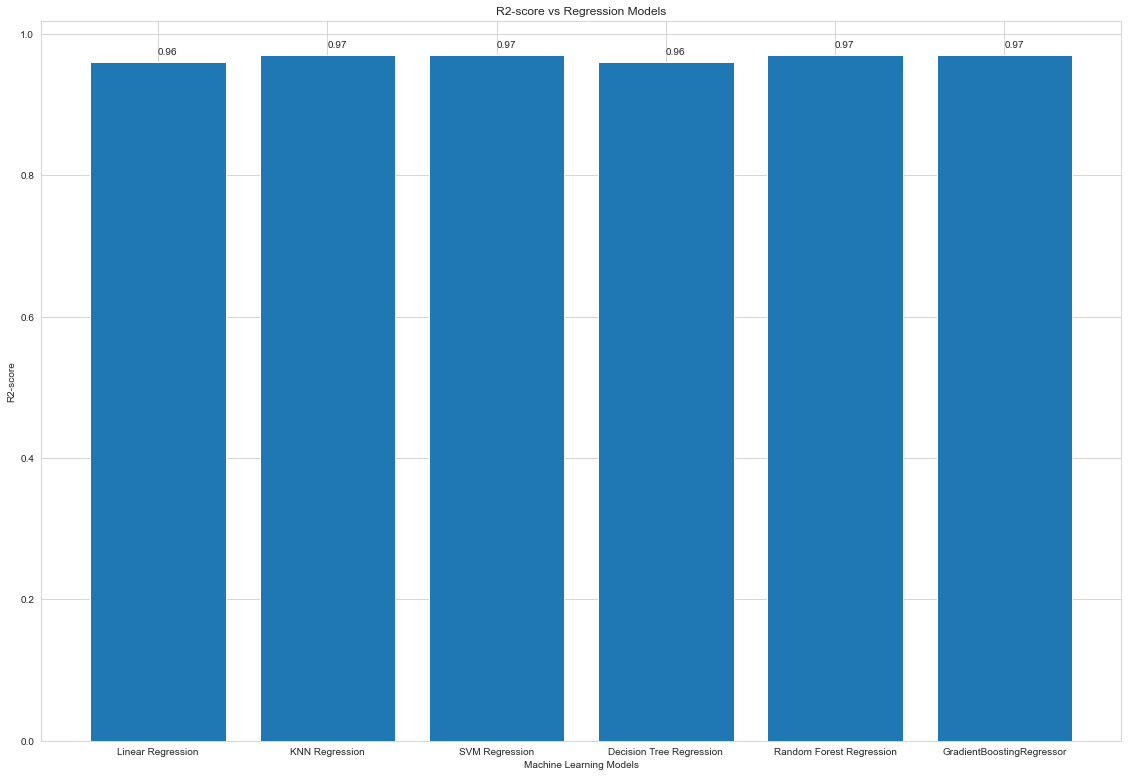

In [64]:
plotthebarchart("R2-score")